<a href="https://colab.research.google.com/github/AvaCook/cs315/blob/main/MergesortPoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ava Cook HW 4
Used ChatGPT to help with Ratio test and matplotlib visualization

In [ ]:
import random
import time
import matplotlib.pyplot as plt

In [ ]:

# Merge procedure
def Merge(A, p, q, r):
    nL = q - p + 1
    nR = r - q
    Left = []
    Right = []

    for i in range(nL):
        Left.append(A[p + i])
    for j in range(nR):
        Right.append(A[q + 1 + j])

    i = 0
    j = 0
    k = p
    while i < nL and j < nR:
        if Left[i] <= Right[j]:
            A[k] = Left[i]
            i += 1
        else:
            A[k] = Right[j]
            j += 1
        k += 1

    while i < nL:
        A[k] = Left[i]
        i += 1
        k += 1

    while j < nR:
        A[k] = Right[j]
        j += 1
        k += 1


In [ ]:
# Mergesort procedure
def Mergesort(A, p, r, print_flag=False):
    if p >= r:
        return
    q = (p + r) // 2
    Mergesort(A, p, q, print_flag)
    Mergesort(A, q+1, r, print_flag)
    Merge(A, p, q, r)
    if print_flag:
        print(A)
    return A


In [ ]:
# Wrapper for convenience
def mergesort_driver(A, print_flag=False):
    return Mergesort(A, 0, len(A)-1, print_flag)

# Timing wrapper
def time_algorithm(algorithm, arr):
    start = time.time()
    algorithm(arr.copy())
    end = time.time()
    return end - start


# --- Data generation helper ---
def generate_input_list(n, randomize=True):
    if randomize:
        # Random data
        return [random.randint(1, 1000000) for _ in range(n)]
    else:
        # Already sorted data
        return list(range(1, n+1))

# Test sizes for Merge Sort (n log n so we can go larger)
Ns = [1000, 2000, 5000, 10000, 20000, 40000, 80000]
times = []


# Change 'randomize=True' to 'randomize=False' to test sorted input
for n in Ns:
    arr = generate_input_list(n, randomize=True)  # <-- toggle here
    t = time_algorithm(mergesort_driver, arr)
    times.append(t)


N values: [1000, 2000, 5000, 10000, 20000, 40000, 80000]
Times: [0.0023415088653564453, 0.005238771438598633, 0.014554023742675781, 0.03148484230041504, 0.06841254234313965, 0.1503291130065918, 0.3565030097961426]
Ratios (T(2n)/T(n)): [2.2373485388453314, 2.7781368042597734, 2.163308433261254, 2.1728723202859372, 2.1973911194906304, 2.371483491561014]


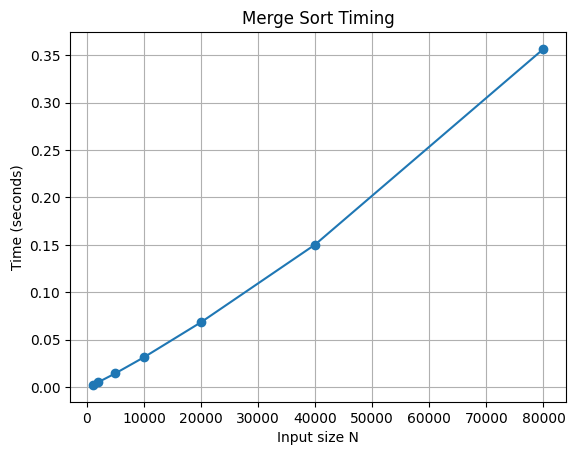

In [ ]:
# Print results
print("N values:", Ns)
print("Times:", times)

# Ratio Test (expected ~2 since O(n log n))
ratios = []
for i in range(1, len(times)):
    ratios.append(times[i] / times[i-1])
print("Ratios (T(2n)/T(n)):", ratios)

# Plot
plt.plot(Ns, times, marker='o')
plt.xlabel('Input size N')
plt.ylabel('Time (seconds)')
plt.title('Merge Sort Timing')
plt.grid(True)
plt.show()
